In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [212]:
df.location = np.array([["".join([y.strip() for y in str(x).split()])]for x in df.location]).reshape(1,-1)[0]
df.keyword = df.keyword.astype("str")

In [213]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer() 
stopwords = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


In [173]:
from wordcloud import WordCloud, STOPWORDS
#Wordcloud REAL
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate("".join([x.lower() for x in df.text[df.target==1]]))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

ModuleNotFoundError: No module named 'wordcloud'

In [174]:
#WORDCLOUD FAKE
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate("".join([x.lower() for x in df.text[df.target==0]]))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

NameError: name 'WordCloud' is not defined

In [214]:

def pos_lemmatize(sentence):
    values = [x.lower() for x in word_tokenize(sentence)]
    pos = nltk.pos_tag(values)
    dict_pos = {"J": wordnet.ADJ,
                "NN": wordnet.NOUN,
                "VBD": wordnet.VERB,
                "VBZ": wordnet.VERB,
                "VBG": wordnet.VERB,
                "VBN": wordnet.VERB,
                "RB": wordnet.ADV}
    values = [lemmatizer.lemmatize(values[x],pos=dict_pos.get(pos[x][1], wordnet.NOUN)) for x in range(len(values))] 
    values = [value for value in values if value not in stopwords] # and len(value) > 1
    return " ".join(values)
df["n-text"] = df.text.apply(pos_lemmatize) #get lemmatized words for each word in sentence - lemmatized: walked --> walk


In [215]:
df["n-text"]

0            deed reason # earthquake may allah forgive u
1                 forest fire near la ronge sask . canada
2       resident ask 'shelter place ' notify officer ....
3       13,000 people receive # wildfire evacuation or...
4       get send photo ruby # alaska smoke # wildfire ...
                              ...                        
7608    two giant crane hold bridge collapse nearby ho...
7609    @ aria_ahrary @ thetawniest control wild fire ...
7610    m1.94 [ 01:04 utc ] ? 5km volcano hawaii . htt...
7611    police investigate e-bike collided car little ...
7612    latest : home raze northern california wildfir...
Name: n-text, Length: 7613, dtype: object

In [216]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 1000
df["encoded"] = [one_hot(sentence, vocab_size) for sentence in df["n-text"]]

In [217]:
df.encoded

0                      [845, 674, 640, 362, 590, 40, 901]
1                     [988, 350, 754, 224, 405, 215, 480]
2       [138, 936, 579, 409, 449, 57, 828, 744, 409, 4...
3                 [994, 998, 713, 793, 23, 744, 408, 341]
4            [744, 515, 186, 838, 809, 123, 23, 307, 904]
                              ...                        
7608    [4, 281, 589, 96, 152, 182, 50, 773, 341, 743,...
7609    [151, 814, 451, 371, 219, 350, 341, 356, 447, ...
7610    [357, 52, 604, 709, 749, 140, 671, 785, 341, 7...
7611    [700, 641, 590, 172, 267, 136, 536, 47, 590, 1...
7612    [425, 773, 292, 447, 341, 23, 792, 395, 341, 7...
Name: encoded, Length: 7613, dtype: object

In [179]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 20
Xtext = pad_sequences(list(df.encoded), maxlen=max_length, padding='pre')

In [229]:
kf = pd.concat([df.iloc[:,:-1],tf])
tf = pd.read_csv("test.csv")
key1 = pd.DataFrame({"loc":kf.location.unique()}).reset_index()
df = df.merge(key1, left_on="location", right_on="loc")
key2 = pd.DataFrame({"key":kf.keyword.unique()}).reset_index()
df = df.merge(key2, left_on="keyword", right_on="key")
Xother = np.array(df[["index_x","index_y"]])
y = np.array(df.target)
#TREAT KEYWORD/LOCATION AS TEXT. 
#You can use keras with one hot or lael encoder for categorical and numerical data models though


In [168]:
#df["Other"] = df["location"]+df["keyword"]
#df["n-encoded"] = [one_hot(sentence, 5000) for sentence in df["Other"]]
#max_length = 2
#Xother = pad_sequences(list(df["n-encoded"]), maxlen=max_length, padding='pre')

In [220]:
from sklearn.model_selection import train_test_split 
arr = np.concatenate((Xtext, Xother), axis=1)
x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.20, random_state=42) #default shuffle = True but random state = 42 means always same random shuffle

Xtext_train = x_train[:,:-2]
Xother_train = x_train[:,-2:]
Xtext_test = x_test[:,:-2]
Xother_test = x_test[:,-2:]

In [221]:
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout,concatenate, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
def create_text(dim, regress=False):
    embedding_vector_features = int(min(dim/2, 50))
    model = Sequential()
    model.add(Embedding(1000,40,input_length=20)) #model.add(Embedding(input_dim=dim, output_dim=50))
    ## embedding layer used 40 features to make feature representation of the sentences
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(Dropout(0.5)) ## drop out layer to make the model more regularized
    
    return model

def create_OtherData(dim, regress=False):
    embedding_vector_features = int(min(dim/2, 50))
    model = Sequential()
    model.add(Embedding(5000,40,input_length=2)) ## embedding layer used 40 features to make feature representation of the sentences
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dropout(0.5)) ## drop out layer to make the model more regularized
    
    # return our model
    return model

In [222]:
text = create_text(Xtext.shape[1], regress=False)
other = create_OtherData(Xother.shape[1], regress=False)
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([text.output, other.output])
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(1, activation="sigmoid")(combinedInput)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[text.input, other.input], outputs=x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [223]:
history = model.fit([Xtext_train, Xother_train], y_train, validation_split=.2, epochs=2, batch_size=5, verbose=1)

Epoch 1/2
975/975 [==============================] - 10s 9ms/step - loss: 0.6740 - accuracy: 0.5878 - val_loss: 0.5715 - val_accuracy: 0.7479
Epoch 2/2
975/975 [==============================] - 8s 9ms/step - loss: 0.5341 - accuracy: 0.7424 - val_loss: 0.5299 - val_accuracy: 0.7323


In [116]:
#history = model.fit([Xtext, Xother], y, validation_split=.2, epochs=5, batch_size=5, verbose=1)
#history = model.fit([Xtext_train, Xother_train], y_train, validation_split=.2, epochs=5, batch_size=5, verbose=1)
#Does best when you use to both but I guess because the test and train data is in the first one

In [224]:
loss, accuracy = model.evaluate([Xtext_test,Xother_test],y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 73.407745


In [225]:
model.save("final2")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2289: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1376: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


INFO:tensorflow:Assets written to: final2/assets


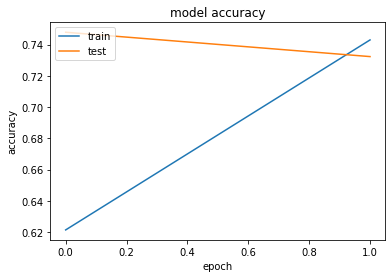

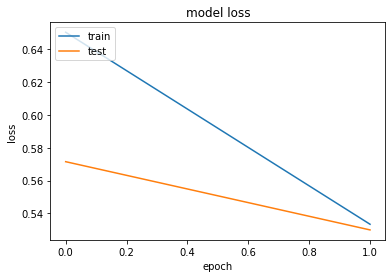

In [226]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [230]:
def prepareData(df):
    df["n-text"] = df.text.apply(pos_lemmatize)
    vocab_size = 1000
    df["encoded"] = [one_hot(sentence, vocab_size) for sentence in df["n-text"]]
    max_length = 20
    text = pad_sequences(list(df.encoded), maxlen=max_length, padding='pre')
    df = df.merge(key1, left_on="location", right_on="loc")
    df = df.merge(key2, left_on="keyword", right_on="key")
    other = np.array(df[["index_x","index_y"]])
    return text, other
tf = pd.read_csv("test.csv")
text, other = prepareData(tf)

In [248]:
submission = pd.DataFrame({"id":tf.id,"target":[int(round(x,0)) for x in model.predict([text,other]).reshape(1,-1)[0]]})
submission.to_csv("submission.csv", index=False)

In [298]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


In [ ]:
# Building Pipeline for raw text transformation: INTERESTING
clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words= "english")),
    ('classifier', LogisticRegression()),
    ])